# **Regularisation in Keras - Part 1 - No Regularisation**
### **First we train a CNN on the Fashion-MNIST Dataset usng NO Regularisation Methods**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-12-02%20at%204.01.54%402x.png)
---



---


1. Loading, Inspecting and Visualising our data
2. Preprocessing our data
3. Build a Simple CNN without Regularisation
4. Train our CNN
5. Take a look at Data Augmentation

# **Loading, Inspecting and Visualising our data**

In [1]:
# We load our data directly from the included datasets in tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist

# loads the Fashion-MNIST training and test dataset
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

# Our Class Names, when loading data from .datasets() our classes are integers
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### **Check to see if we're using the GPU**

In [2]:
# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4323370291871007962
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4772502094786954
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### **Inspect our Data**

In [3]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


### **Visualizing some of our sample Data**

Let's plot 50 sample images.

<Figure size 640x480 with 0 Axes>

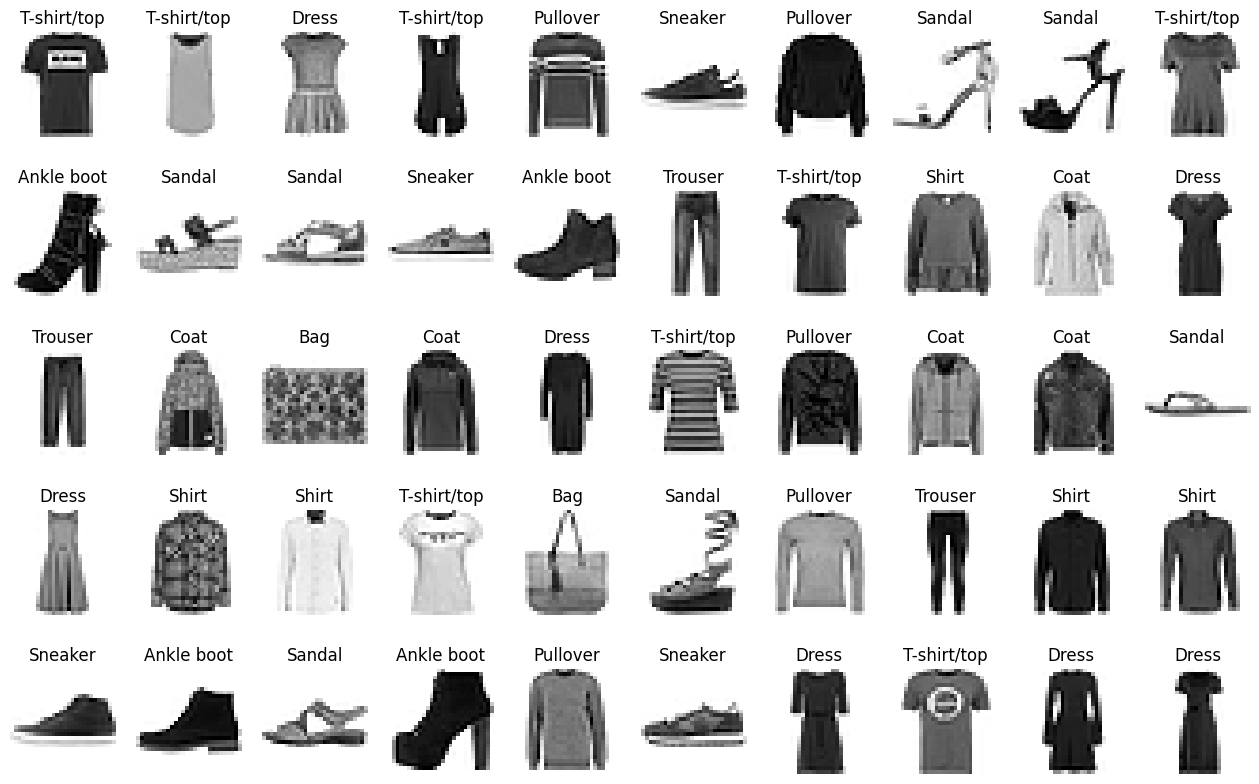

In [4]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    class_names = classes[y_train[index]]
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

# **2. Data Preprocessing**

First let's keep track of some data dimensions:
- ```img_rows``` which should be 28
- ```img_cols``` which should be 28
- ```input_shape```, which is 28 x 28 x 1

In [5]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

### **One Hot Encode our Labels**
**Example of One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)
Also, keep the number classes stored as a variable, ```num_classess```

In [6]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]

Number of Classes: 10


# **3. Building Our Model**

This is the same CNN we used previously for the MNIST classification project.

**Adding Conv Layers**

```Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)```

Our **Conv2D()** creates the filter with the following arguements:
- Number of Filters, we use 32
- kernel_size, we use a 3x3 filter so it's defined as a tuple ```(3,3)```
- activation, where we specify ```'relu'```
- input_shape, which we obtained and stored in a variable above, it is in our example a 28 x 28 grayscale image. Therefore, our shape is ```(28,28,1)```

**Adding MaxPool Layers**

Again, we use ```model.add()``` and specify ```MaxPooling2D(pool_size=(2,2))```.

We use the input arguement pool_size to define our window size. We can specify stride and padding like this:

```pool_size=(2, 2), strides=None, padding='valid'```

However, note the default stride is used as the pooling window size (2 in our case).

Using ```padding ='valid'``` means we use no padding.

**Adding Flatten**

Using model.add(Flatten()) we are simply flattening the output of our last node. Which equates to 12 x 12 * 64 * 1 = 9216.

**Adding Dense or Fully Connected Layers**

```model.add(Dense(128, activation='relu'))```

We use ```model.add()``` yet again and specify the number of nodes that our previous layer will be connnecting too. We also specify the activation function of ReLU here.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

# create model
model = Sequential()

# Add our layers using model.add()

# We create a Conv2D layer with our specifications
# Here we are using 32 filters, of size 3x3 with ReLU activation
# Our input shape is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# We add a second Conv layer with 64 filters, 3x3 and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# We use a standard MaxPool of 2x2 and a stride of 2 (by default Kera's use the same stride as the window size)
model.add(MaxPooling2D(pool_size=(2, 2)))
# We now flatten our previous layers' output which is 12 x 12 * 64 * 1 = 9216
model.add(Flatten())
# We now connect this flattened later to 128 Nodes of our Fully Connected or Dense Layer, again using ReLU
model.add(Dense(128, activation='relu'))
# We now create our last Fully Connected/Dense layer consisting of 10 nodes which correspond to our output classes
# This is then used with a 'softmax' activation to give us our final class probabilities
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compiling Our Model**

Here we use ```model.compile()``` to compile our model. We specify the following:
- Loss Function - categorical_crossentropy
- Optimizer - SGD or Stochastic Gradient Descent (learning rate of 0.001 and momemtum 0.9)
- metrics - what criteria we'll be assessing performance on. We use accuracy here.

In [8]:
# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.001)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001, momentum=0.9),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


# **4. Training Our Model**

In [9]:
# Set our Batch Size and Epochs
batch_size = 32
epochs = 15

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7626 - loss: 1.3113 - val_accuracy: 0.8543 - val_loss: 0.4039
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8754 - loss: 0.3411 - val_accuracy: 0.8668 - val_loss: 0.3577
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8973 - loss: 0.2791 - val_accuracy: 0.8885 - val_loss: 0.3222
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9129 - loss: 0.2373 - val_accuracy: 0.8824 - val_loss: 0.3406
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9222 - loss: 0.2040 - val_accuracy: 0.8872 - val_loss: 0.3307
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9341 - loss: 0.1727 - val_accuracy: 0.8896 - val_loss: 0.3463
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9428 - loss: 0.1520 - val_accuracy: 0.8916 - val_loss: 0.3603
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9509 - loss: 0.130

# **5. Data Augmentation Example**

We use generators because we can't load the entire dataset in our systems memory. Therefore, use it to to create an iterator so that we can access batches of our data for Data Augmentation or Preprocessing and forward propagating through our network.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reload our data
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

# Reshape our data to be in the format [number of samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Define Data Generator for Augmentation
data_aug_datagen = ImageDataGenerator(rotation_range=30,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      shear_range=0.2,
                                      zoom_range=0.1,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# Create our iterator
aug_iter = data_aug_datagen.flow(x_train[0].reshape(1,28,28,1), batch_size=1)

#### **Show the results of our Data Augmentation**

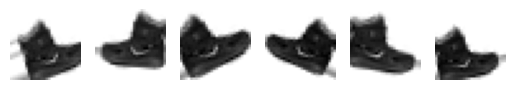

In [12]:
def showAugmentations(augmentations = 6):
    fig = plt.figure()
    for i in range(augmentations):
        a = fig.add_subplot(1,augmentations,i+1)
        img = next(aug_iter)[0].astype('uint8')
        plt.imshow(img, cmap='gray_r')
        plt.axis('off')

showAugmentations(6)